In [ ]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to fetch data for a given year
def fetch_data(year):
    url = f"https://phl.carto.com/api/v2/sql?q=SELECT * FROM incidents_part1_part2 WHERE dispatch_date_time >= '{year}-01-01' AND dispatch_date_time < '{year + 1}-01-01'"
    response = requests.get(url)
    data = response.json()['rows']
    return pd.DataFrame(data)

# Fetch data for each year from 2010 to 2024
years = list(range(2010, 2025))
data_frames = [fetch_data(year) for year in years]

# Concatenate all data frames
filtered_crime_data = pd.concat(data_frames, ignore_index=True)

# Extract the year from 'dispatch_date'
filtered_crime_data['dispatch_date'] = pd.to_datetime(filtered_crime_data['dispatch_date_time'])
filtered_crime_data['year'] = filtered_crime_data['dispatch_date'].dt.year

# Group the data by year and crime type and count occurrences
crime_counts_per_year = filtered_crime_data.groupby(['year', 'text_general_code']).size().unstack(fill_value=0).fillna(0)

# Plot the pairplot
sns.pairplot(crime_counts_per_year)
plt.suptitle('Pairplot of Crime Counts by Year', y=1.02)
plt.show()


In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Function to fetch data for a given year
def fetch_data(year):
    url = f"https://phl.carto.com/api/v2/sql?q=SELECT * FROM incidents_part1_part2 WHERE dispatch_date_time >= '{year}-01-01' AND dispatch_date_time < '{year + 1}-01-01'"
    response = requests.get(url)
    data = response.json()['rows']
    return pd.DataFrame(data)

# Fetch data for each year from 2010 to 2024
years = list(range(2010, 2025))
data_frames = [fetch_data(year) for year in years]

# Concatenate all data frames
filtered_crime_data = pd.concat(data_frames, ignore_index=True)

# Step 1: Extract the month and year from 'dispatch_date' using .loc
filtered_crime_data['dispatch_date'] = pd.to_datetime(filtered_crime_data['dispatch_date_time'])
filtered_crime_data['year'] = filtered_crime_data['dispatch_date'].dt.year

# Group the data by year and crime type and count occurrences
crime_counts_per_year = filtered_crime_data.groupby(['year', 'text_general_code']).size().unstack(fill_value=0)

# Calculate the year-over-year percentage change for each crime type
percentage_change = crime_counts_per_year.pct_change() * 100

# Plot the data for each crime type
num_crimes = len(percentage_change.columns)
fig, axes = plt.subplots(nrows=(num_crimes + 1) // 2, ncols=2, figsize=(18, num_crimes * 2), sharey=True)
axes = axes.flatten()

for i, crime in enumerate(percentage_change.columns):
    if i < len(axes):
        percentage_change[crime].plot(kind='bar', ax=axes[i], color='skyblue', title=crime)
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('Percentage Change (%)')
        axes[i].axhline(0, color='gray', linewidth=0.8)

plt.tight_layout()
plt.show()

# Display the percentage change values
percentage_change


In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to fetch data for a given year
def fetch_data(year):
    url = f"https://phl.carto.com/api/v2/sql?q=SELECT * FROM incidents_part1_part2 WHERE dispatch_date_time >= '{year}-01-01' AND dispatch_date_time < '{year + 1}-01-01'"
    response = requests.get(url)
    data = response.json()['rows']
    return pd.DataFrame(data)

# Fetch data for each year from 2019 to 2024
years = [2019, 2020, 2021, 2022, 2023, 2024]
data_frames = [fetch_data(year) for year in years]

# Concatenate all data frames
filtered_crime_data = pd.concat(data_frames, ignore_index=True)

# Step 1: Extract the month and year from 'dispatch_date' using .loc
filtered_crime_data['dispatch_date'] = pd.to_datetime(filtered_crime_data['dispatch_date_time'])
filtered_crime_data['month'] = filtered_crime_data['dispatch_date'].dt.month
filtered_crime_data['year'] = filtered_crime_data['dispatch_date'].dt.year

# Filter data for May (month = 5) for each year
may_data = filtered_crime_data[(filtered_crime_data['month'] == 5) & (filtered_crime_data['year'].isin(years))]

# Group by year and crime type and count occurrences
may_crime_counts = may_data.groupby(['year', 'text_general_code']).size().unstack(fill_value=0).fillna(0)

# Find the top crimes by total occurrences across all years
sorted_crimes = may_crime_counts.sum().sort_values(ascending=False)

# Get the next 5 crimes (16th to 20th)
next_next_next_5_crimes = sorted_crimes.iloc[15:20].index

# Filter the data to include only the next 5 crimes
next_next_next_5_crime_counts = may_crime_counts[next_next_next_5_crimes]

# Plot the data
fig, ax = plt.subplots(figsize=(14, 10))

# Plot each crime type with bars for each year
next_next_next_5_crime_counts.plot(kind='barh', ax=ax, width=0.8)

plt.title('Next 5 Crime Counts in May (2019-2024) [16th to 20th]')
plt.ylabel('Crime Type')
plt.xlabel('Count of Crimes')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to fetch data for a given year
def fetch_data(year):
    url = f"https://phl.carto.com/api/v2/sql?q=SELECT * FROM incidents_part1_part2 WHERE dispatch_date_time >= '{year}-01-01' AND dispatch_date_time < '{year + 1}-01-01'"
    response = requests.get(url)
    data = response.json()['rows']
    return pd.DataFrame(data)

# Fetch data for each year from 2019 to 2024
years = [2019, 2020, 2021, 2022, 2023, 2024]
data_frames = [fetch_data(year) for year in years]

# Concatenate all data frames
filtered_crime_data = pd.concat(data_frames, ignore_index=True)

# Step 1: Extract the month and year from 'dispatch_date' using .loc
filtered_crime_data['dispatch_date'] = pd.to_datetime(filtered_crime_data['dispatch_date_time'])
filtered_crime_data['month'] = filtered_crime_data['dispatch_date'].dt.month
filtered_crime_data['year'] = filtered_crime_data['dispatch_date'].dt.year

# Filter data for May (month = 5) for each year
may_data = filtered_crime_data[(filtered_crime_data['month'] == 5) & (filtered_crime_data['year'].isin(years))]

# Group by year and crime type and count occurrences
may_crime_counts = may_data.groupby(['year', 'text_general_code']).size().unstack(fill_value=0).fillna(0)

# Find the top crimes by total occurrences across all years
sorted_crimes = may_crime_counts.sum().sort_values(ascending=False)

# Get the next 5 crimes (11th to 15th)
next_next_5_crimes = sorted_crimes.iloc[10:15].index

# Filter the data to include only the next 5 crimes
next_next_5_crime_counts = may_crime_counts[next_next_5_crimes]

# Plot the data
fig, ax = plt.subplots(figsize=(14, 10))

# Plot each crime type with bars for each year
next_next_5_crime_counts.plot(kind='barh', ax=ax, width=0.8)

plt.title('Next 5 Crime Counts in May (2019-2024) [11th to 15th]')
plt.ylabel('Crime Type')
plt.xlabel('Count of Crimes')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to fetch data for a given year
def fetch_data(year):
    url = f"https://phl.carto.com/api/v2/sql?q=SELECT * FROM incidents_part1_part2 WHERE dispatch_date_time >= '{year}-01-01' AND dispatch_date_time < '{year + 1}-01-01'"
    response = requests.get(url)
    data = response.json()['rows']
    return pd.DataFrame(data)

# Fetch data for each year from 2019 to 2024
years = [2019, 2020, 2021, 2022, 2023, 2024]
data_frames = [fetch_data(year) for year in years]

# Concatenate all data frames
filtered_crime_data = pd.concat(data_frames, ignore_index=True)

# Step 1: Extract the month and year from 'dispatch_date' using .loc
filtered_crime_data['dispatch_date'] = pd.to_datetime(filtered_crime_data['dispatch_date_time'])
filtered_crime_data['month'] = filtered_crime_data['dispatch_date'].dt.month
filtered_crime_data['year'] = filtered_crime_data['dispatch_date'].dt.year

# Filter data for May (month = 5) for each year
may_data = filtered_crime_data[(filtered_crime_data['month'] == 5) & (filtered_crime_data['year'].isin(years))]

# Group by year and crime type and count occurrences
may_crime_counts = may_data.groupby(['year', 'text_general_code']).size().unstack(fill_value=0).fillna(0)

# Find the top crimes by total occurrences across all years
sorted_crimes = may_crime_counts.sum().sort_values(ascending=False)

# Get the next 5 crimes (6th to 10th)
next_5_crimes = sorted_crimes.iloc[5:10].index

# Filter the data to include only the next 5 crimes
next_5_crime_counts = may_crime_counts[next_5_crimes]

# Plot the data
fig, ax = plt.subplots(figsize=(14, 10))

# Plot each crime type with bars for each year
next_5_crime_counts.plot(kind='barh', ax=ax, width=0.8)

plt.title('Next 5 Crime Counts in May (2019-2024)')
plt.ylabel('Crime Type')
plt.xlabel('Count of Crimes')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


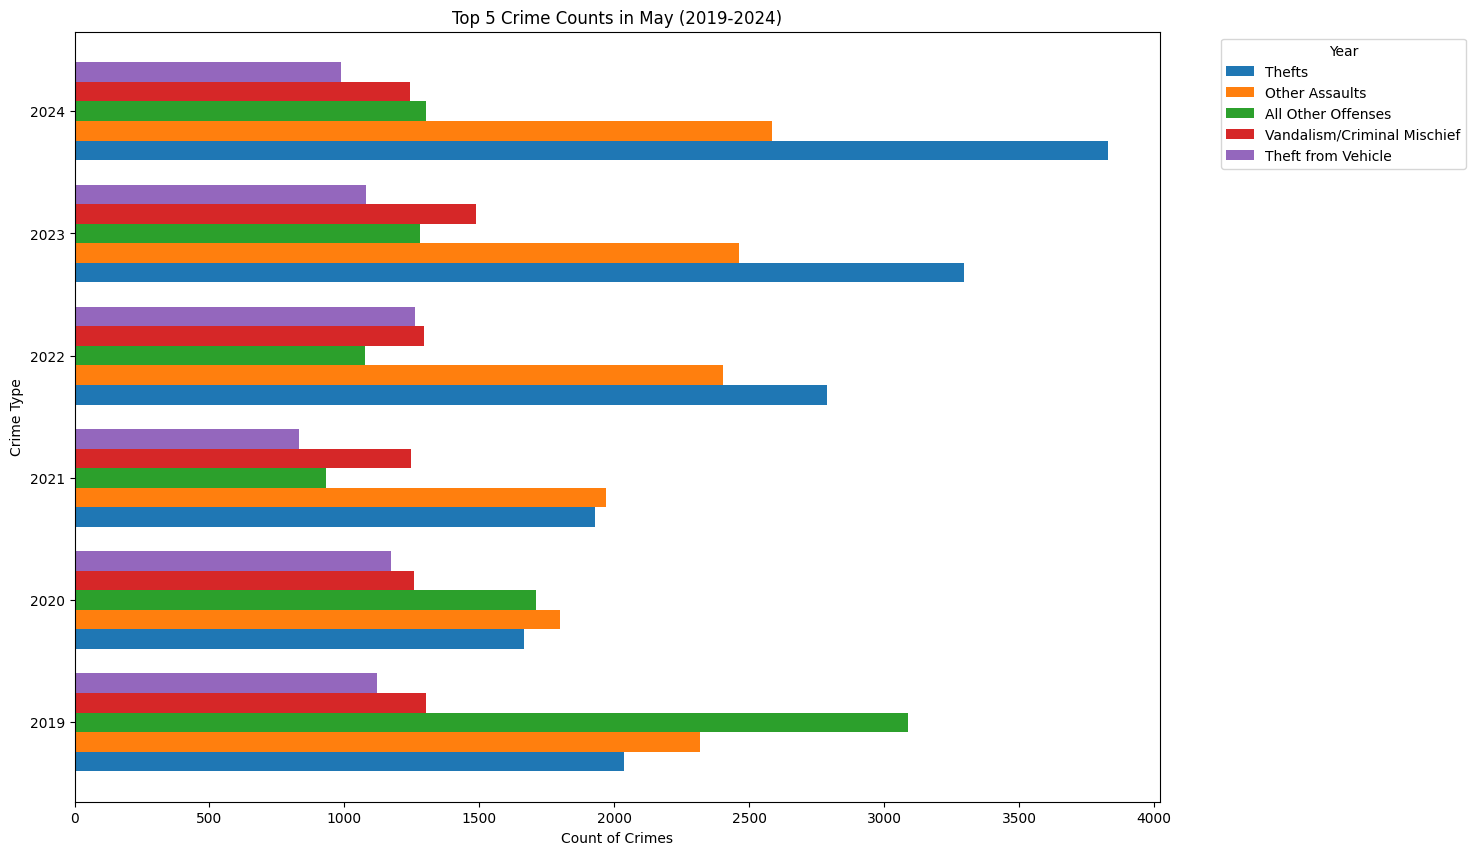

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to fetch data for a given year
def fetch_data(year):
    url = f"https://phl.carto.com/api/v2/sql?q=SELECT * FROM incidents_part1_part2 WHERE dispatch_date_time >= '{year}-01-01' AND dispatch_date_time < '{year + 1}-01-01'"
    response = requests.get(url)
    data = response.json()['rows']
    return pd.DataFrame(data)

# Fetch data for each year from 2019 to 2024
years = [2019, 2020, 2021, 2022, 2023, 2024]
data_frames = [fetch_data(year) for year in years]

# Concatenate all data frames
filtered_crime_data = pd.concat(data_frames, ignore_index=True)

# Step 1: Extract the month and year from 'dispatch_date' using .loc
filtered_crime_data['dispatch_date'] = pd.to_datetime(filtered_crime_data['dispatch_date_time'])
filtered_crime_data['month'] = filtered_crime_data['dispatch_date'].dt.month
filtered_crime_data['year'] = filtered_crime_data['dispatch_date'].dt.year

# Filter data for May (month = 5) for each year
may_data = filtered_crime_data[(filtered_crime_data['month'] == 5) & (filtered_crime_data['year'].isin(years))]

# Group by year and crime type and count occurrences
may_crime_counts = may_data.groupby(['year', 'text_general_code']).size().unstack(fill_value=0).fillna(0)

# Find the top 5 crimes by total occurrences across all years
top_5_crimes = may_crime_counts.sum().sort_values(ascending=False).head(5).index

# Filter the data to include only the top 5 crimes
top_5_crime_counts = may_crime_counts[top_5_crimes]

# Plot the data
fig, ax = plt.subplots(figsize=(14, 10))

# Plot each crime type with bars for each year
top_5_crime_counts.plot(kind='barh', ax=ax, width=0.8)

plt.title('Top 5 Crime Counts in May (2019-2024)')
plt.ylabel('Crime Type')
plt.xlabel('Count of Crimes')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
